In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import os

In [2]:
working_dir = os.getcwd()

# Load data
train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X = train_data[['WS10']].values
y = train_data[['POWER']].values

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [4]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
402/402 [==============================] - 2s 3ms/step - loss: 0.1007 - root_mean_squared_error: 0.3173 - val_loss: 0.0573 - val_root_mean_squared_error: 0.2393
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.0531 - root_mean_squared_error: 0.2305 - val_loss: 0.0522 - val_root_mean_squared_error: 0.2284
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.0512 - root_mean_squared_error: 0.2264 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 0.0506 - root_mean_squared_error: 0.2250 - val_loss: 0.0503 - val_root_mean_squared_error: 0.2242
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.0502 - root_mean_squared_error: 0.2241 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2247
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0496 

In [6]:
weather_forecast_input = pd.read_csv(f'{working_dir}/../data/WeatherForecastInput.csv')
X_test = scaler.transform(weather_forecast_input[['WS10']].values)
y_pred = model.predict(X_test)

23/23 [==============================] - 0s 2ms/step


In [7]:
solution = pd.read_csv(f'{working_dir}/../data/Solution.csv')
y_true = solution[['POWER']].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

RMSE: 0.21530182755325183


In [8]:
forecast_template = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template['FORECAST'] = y_pred
forecast_template.to_csv(f'{working_dir}/results/ForecastTemplate1-NN.csv', index=False)

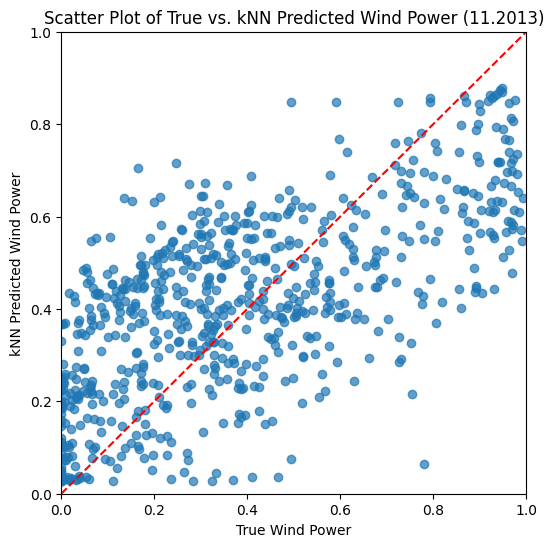

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('True Wind Power')
plt.ylabel('kNN Predicted Wind Power')
plt.title('Scatter Plot of True vs. kNN Predicted Wind Power (11.2013)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

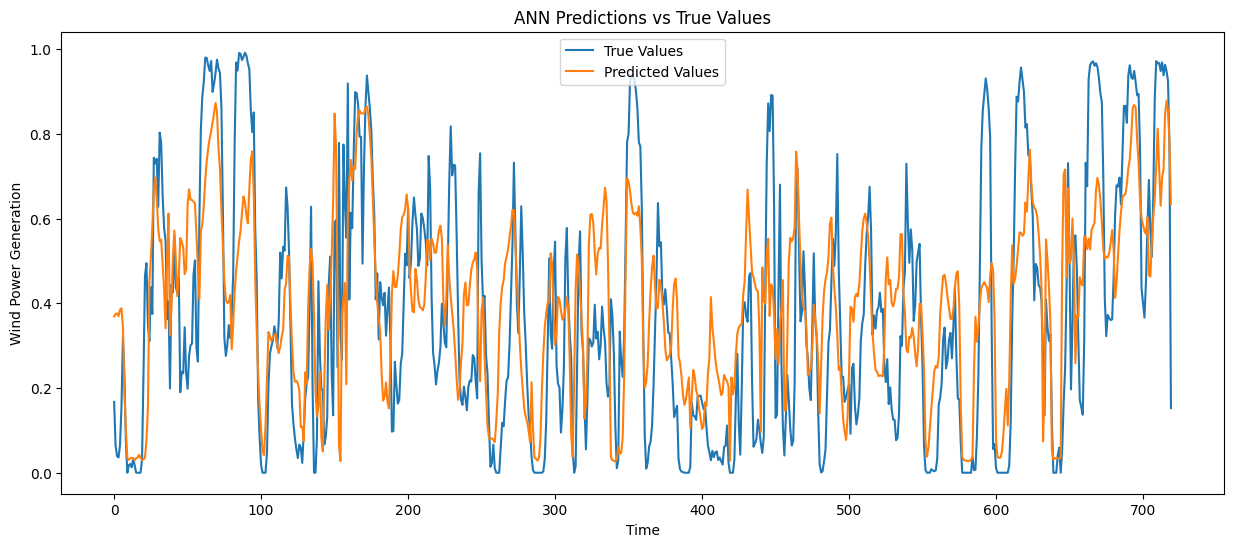

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Wind Power Generation')
plt.title('ANN Predictions vs True Values')
plt.legend()
plt.show()